In [2]:
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
# # If we want to combine output files
# file1 = 'C:/Users/nicho/Downloads/Training Outputs/first_combine.txt'
# file2 = 'C:/Users/nicho/Downloads/Training Outputs/wim_1_ref.txt'
# output_dir = 'C:/Users/nicho/Downloads/Training Outputs/combined.txt'

# try:
#     with open(file1, 'r', encoding="utf-8") as f1:
#         content1 = f1.read()

#     with open(file2, 'r', encoding="utf-8") as f2:
#         content2 = f2.read()

#     with open(output_dir, 'w', encoding="utf-8") as f_out:
#         f_out.write(content1)
#         f_out.write(content2)

# except FileNotFoundError:
#     print('File does not exist')

In [5]:
# This extracts the log information for processing
def extract_metric_series(log_file_path):
    metric_dict = defaultdict(list)

    with open(log_file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()

            if line.startswith("{") and line.endswith("}"):
                try:
                    data = ast.literal_eval(line)
                    if isinstance(data, dict) and "loss" in data:
                        for key, value in data.items():
                            metric_dict[key].append(value)
                except Exception:
                    continue

    return dict(metric_dict)

In [7]:
# Get metrics
log_file = "C:/Users/nicho/Downloads/Training Outputs/wim_1_ref_v2.txt"
#log_file = "Training Results\\Metrics\\wim_zeta1.0_output_first.txt"
metrics_over_time = extract_metric_series(log_file)

In [ ]:
# # Change the entropy into per token
# num_tokens = 64
# for i in range(len(metrics_over_time['objective/entropy'])):
#     metrics_over_time['objective/entropy'][i] /= num_tokens

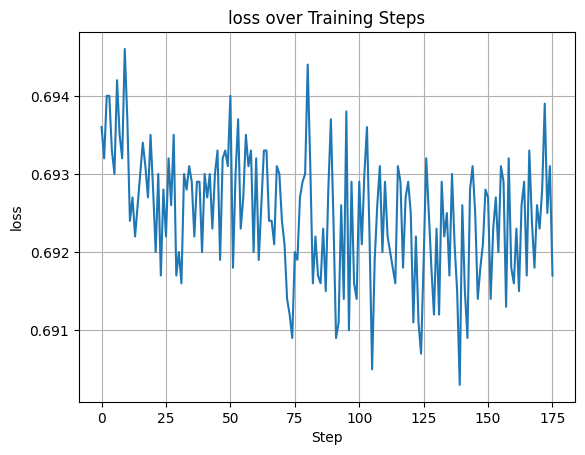

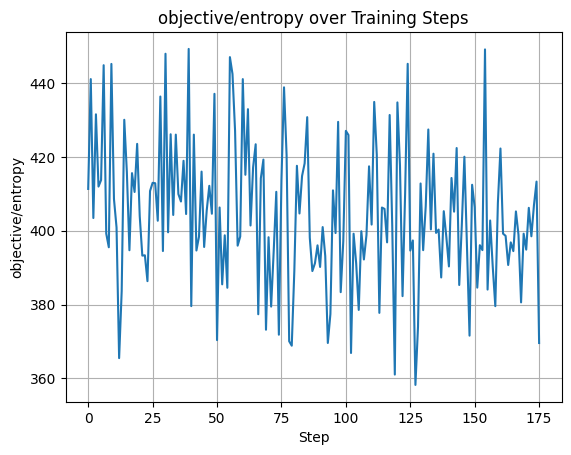

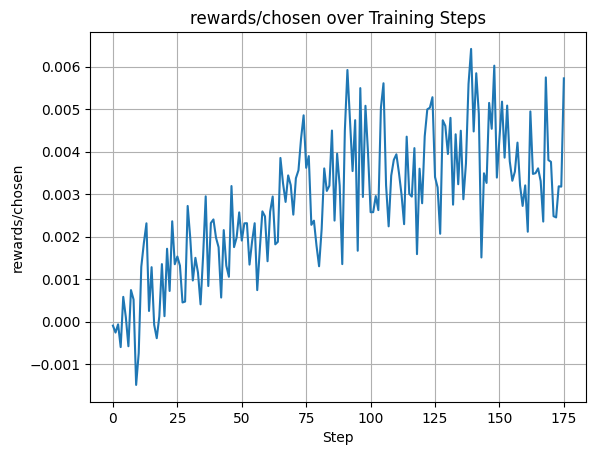

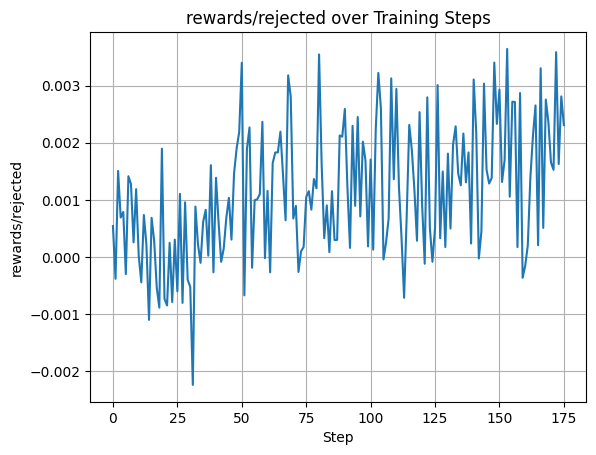

In [8]:
# Create the metrics
wanted_list = ['loss', 'objective/entropy', 'rewards/chosen', 'rewards/rejected']
wanted_metrics = set(wanted_list)

for metric in metrics_over_time:
    if metric in wanted_metrics:
        metric_list = metrics_over_time[metric]
        steps = list(range(len(metric_list)))

        plt.figure()
        plt.plot(steps, metric_list, label=metric)
        plt.xlabel('Step')
        plt.ylabel(metric)
        plt.title(metric + ' over Training Steps')
        plt.grid(True)
        plt.show()

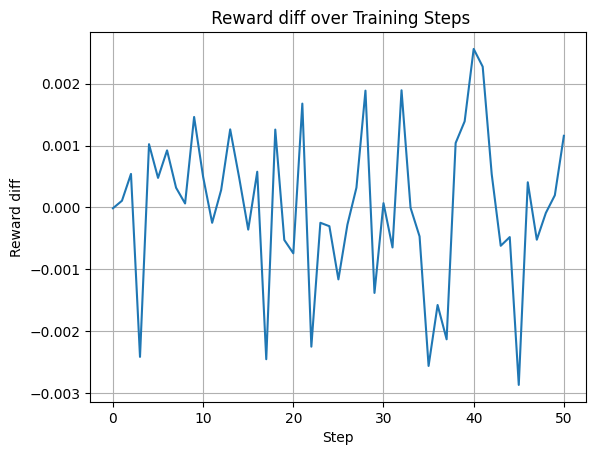

In [5]:
# Getting the reward separation
reward_diff = []
for i, chosen in enumerate(metrics_over_time['rewards/chosen']):
    reward_diff.append(chosen - metrics_over_time['rewards/rejected'][i])

steps = list(range(len(metric_list)))
plt.figure()
plt.plot(steps, reward_diff, label='Reward diff')
plt.xlabel('Step')
plt.ylabel('Reward diff')
plt.title(' Reward diff over Training Steps')
plt.grid(True)
plt.show()

In [8]:
with open("reward_diff.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(reward_diff)  

In [6]:
# Getting the starting and final loss
final_loss = metrics_over_time['loss'][-1]
print(f'Final Loss: {final_loss}')

starting_loss = metrics_over_time['loss'][0]
print(f'Starting Loss: {starting_loss}')

min_loss = np.min(metrics_over_time['loss'])
print(f'Minimum Loss: {min_loss}')

Final Loss: 0.6927
Starting Loss: 0.6932
Minimum Loss: 0.6921


In [7]:
# Getting the starting and final entropy
final_entropy = metrics_over_time['objective/entropy'][-1]
print(f'Final entropy: {final_entropy}')

starting_entropy = metrics_over_time['objective/entropy'][0]
print(f'Starting entropy: {starting_entropy}')

min_entropy = np.min(metrics_over_time['objective/entropy'])
print(f'Minimum entropy: {min_entropy}')

Final entropy: 402.9507555961609
Starting entropy: 440.7015410423279
Minimum entropy: 379.4322774887085
